In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")

2022-09-19 11:57:08.258876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-19 11:57:08.390942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-19 11:57:08.390962: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-19 11:57:08.416485: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-19 11:57:08.950886: W tensorflow/stream_executor/platform/de

In [2]:
dataset_train = pd.read_csv("/home/rabi/Desktop/Project/train.csv")
dataset_test = pd.read_csv("/home/rabi/Desktop/Project/test.csv")

In [3]:
dataset_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/rabi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

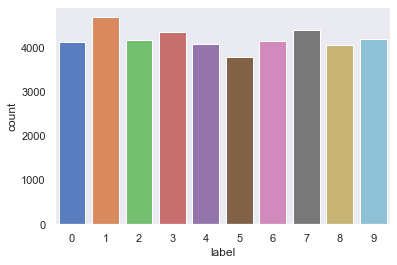

In [5]:
Y_train = dataset_train['label']
#Dropping Label Column
X_train = dataset_train.drop(labels=['label'],axis=1)

del dataset_train

graph = sns.countplot(Y_train)
Y_train.value_counts()

In [6]:
#Checking for any null or missing values
X_train.isnull().any().describe()
dataset_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# Normalisation

In [7]:
X_train = X_train/255
dataset_test = dataset_test/255

In [8]:
#reshape
X_train = X_train.values.reshape(-1,28,28,1)  ##-1???
dataset_test = dataset_test.values.reshape(-1,28,28,1)

In [9]:
#Label Encoding
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)

In [10]:
#Spliting Train and test set
random_seed =2
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,
                                                random_state = random_seed)

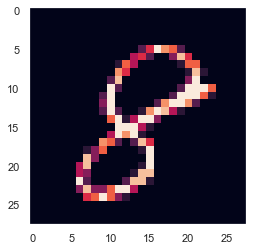

In [11]:
g = plt.imshow(X_train[0][:,:,0])

In [12]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> 
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

2022-09-19 11:57:12.706696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-19 11:57:12.706722: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-19 11:57:12.706739: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Zoro): /proc/driver/nvidia/version does not exist
2022-09-19 11:57:12.707190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#Defining Optimizer

optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/home/rabi/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#Compiling Model

model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])

In [15]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [16]:
epochs=30
batch_size = 112

In [17]:
### Data Agumentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Model Fitting

In [18]:
model.load_weights('/home/rabi/Desktop/Project/model.h5')

In [19]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.. Just wait a few moments...")
else: 
    print("CUDA not Available.. May the force be with you.")

CUDA Available.. Just wait a few moments...


In [20]:
from keras.callbacks import ModelCheckpoint

In [21]:
# Fit the model
checkpoint = ModelCheckpoint(
     'model_best_weights.h5', 
     monitor='val_acc', 
     verbose=1, 
     save_best_only=True, 
     mode='max', 
     period=1, 
)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, 
                              callbacks=[learning_rate_reduction, checkpoint])
model.save('model.h5') 
print("The model has successfully saved") 

Epoch 1/30


/tmp/ipykernel_88175/4223962371.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


337/337 - 78s - loss: 0.0473 - accuracy: 0.9885 - val_loss: 0.0250 - val_accuracy: 0.9931 - lr: 0.0010 - 78s/epoch - 232ms/step
Epoch 2/30
337/337 - 75s - loss: 0.0481 - accuracy: 0.9877 - val_loss: 0.0219 - val_accuracy: 0.9943 - lr: 0.0010 - 75s/epoch - 223ms/step
Epoch 3/30
337/337 - 71s - loss: 0.0458 - accuracy: 0.9886 - val_loss: 0.0335 - val_accuracy: 0.9902 - lr: 0.0010 - 71s/epoch - 212ms/step
Epoch 4/30
337/337 - 71s - loss: 0.0475 - accuracy: 0.9866 - val_loss: 0.0216 - val_accuracy: 0.9943 - lr: 0.0010 - 71s/epoch - 210ms/step
Epoch 5/30
337/337 - 76s - loss: 0.0521 - accuracy: 0.9874 - val_loss: 0.0198 - val_accuracy: 0.9945 - lr: 0.0010 - 76s/epoch - 225ms/step
Epoch 6/30
337/337 - 75s - loss: 0.0484 - accuracy: 0.9875 - val_loss: 0.0367 - val_accuracy: 0.9907 - lr: 0.0010 - 75s/epoch - 224ms/step
Epoch 7/30
337/337 - 71s - loss: 0.0433 - accuracy: 0.9884 - val_loss: 0.0213 - val_accuracy: 0.9929 - lr: 0.0010 - 71s/epoch - 211ms/step
Epoch 8/30
337/337 - 71s - loss: 0.049

337/337 - 81s - loss: 0.0511 - accuracy: 0.9871 - val_loss: 0.0267 - val_accuracy: 0.9919 - lr: 0.0010 - 81s/epoch - 240ms/step
Epoch 23/30
337/337 - 71s - loss: 0.0568 - accuracy: 0.9857 - val_loss: 0.0333 - val_accuracy: 0.9919 - lr: 0.0010 - 71s/epoch - 210ms/step
Epoch 24/30
337/337 - 71s - loss: 0.0508 - accuracy: 0.9870 - val_loss: 0.0318 - val_accuracy: 0.9914 - lr: 0.0010 - 71s/epoch - 210ms/step
Epoch 25/30
337/337 - 71s - loss: 0.0505 - accuracy: 0.9873 - val_loss: 0.0219 - val_accuracy: 0.9945 - lr: 0.0010 - 71s/epoch - 210ms/step
Epoch 26/30
337/337 - 71s - loss: 0.0553 - accuracy: 0.9864 - val_loss: 0.0313 - val_accuracy: 0.9929 - lr: 0.0010 - 71s/epoch - 212ms/step
Epoch 27/30
337/337 - 72s - loss: 0.0525 - accuracy: 0.9865 - val_loss: 0.0235 - val_accuracy: 0.9950 - lr: 0.0010 - 72s/epoch - 212ms/step
Epoch 28/30
337/337 - 72s - loss: 0.0532 - accuracy: 0.9864 - val_loss: 0.0416 - val_accuracy: 0.9921 - lr: 0.0010 - 72s/epoch - 213ms/step
Epoch 29/30
337/337 - 72s - loss

# Analyzing the model

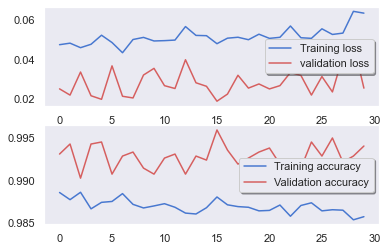

In [22]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

132/132 [==============================] - 1s 9ms/step


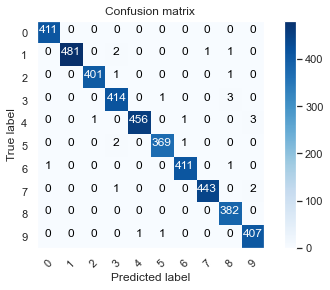

In [23]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [24]:
Y_pred = model.predict(X_val)

132/132 [==============================] - 1s 9ms/step


In [25]:
print(Y_pred)

[[2.5658609e-13 1.8058874e-24 1.5176314e-18 ... 4.1922982e-25
  6.3970856e-11 1.5797623e-13]
 [2.0098116e-21 7.7819908e-21 1.8932807e-12 ... 3.5286294e-09
  7.5170428e-06 9.9978280e-01]
 [1.9504526e-35 3.5080702e-37 5.6625648e-34 ... 3.8503841e-34
  3.7884035e-20 3.5243942e-22]
 ...
 [2.2933448e-26 1.3613619e-25 9.9999994e-01 ... 2.7464515e-14
  2.0477584e-14 6.1478664e-22]
 [1.3571914e-18 9.4408940e-24 9.9999911e-01 ... 1.5926389e-11
  8.7295263e-07 1.6725828e-15]
 [7.7591312e-01 3.0832410e-11 5.3706316e-07 ... 1.5555479e-09
  1.3314150e-04 6.1384426e-06]]


In [26]:
print (np.argmax(Y_pred[0]))

6


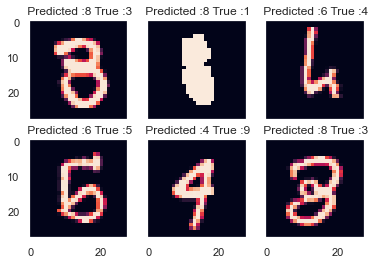

In [27]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [28]:
# predict results
results = model.predict(dataset_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 8s 10ms/step


In [29]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [30]:
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [31]:
import cv2 

In [32]:
img = cv2.imread(r"/home/rabi/Desktop/Project/pic/six.png")

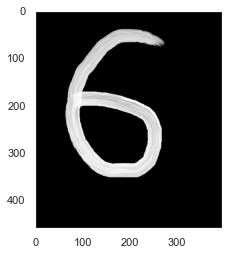

In [33]:
plt.imshow(img)

In [34]:
img.shape

(460, 396, 3)

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [36]:
gray.shape

(460, 396)

In [37]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [38]:
resized.shape

(28, 28)

In [39]:
newing = tf.keras.utils.normalize (resized, axis = 1) ## 0 to 1 scaling

In [40]:
newing = np.array(newing).reshape(-1, 28, 28,1) ## kernal operation of convolutional layer

In [41]:
newing.shape

(1, 28, 28, 1)

In [42]:
predictions = model.predict(newing)

1/1 [==============================] - 0s 19ms/step


In [43]:
print (np.argmax(predictions))

6
